# Abstract Street Analysis
+ collisions dataset aggregate
    + total collision volume
        + by streetID (float): (collision volume/total collisions)
    + average collision 
        + by hour (float): average((hourly-collision volume/total collision on that segment)) (percentage)
        + by the day of the week (float): average(collision volume/total collision on that segment)
        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Collisions dataset aggregation

In [2]:
collisions = pd.read_csv("../matched_data/crash_matched_data/collisions_matched.tsv", sep='\t')
collisions.columns

/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_88411/1904505440.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions = pd.read_csv("../matched_data/crash_matched_data/collisions_matched.tsv", sep='\t')


Index(['collision_id', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'coords', 'index_right', 'Roadway.Name', 'From', 'To', 'int1', 'int2',
       'zip1', 'zip2', 'll1', 'll2', 'streetID', 'lat1', 'long1', 'lat2',
       'long2'],
      dtype='object')

In [3]:
collisions['CRASH DATE'] = pd.to_datetime(collisions['CRASH DATE'])
collisions['dayofweek'] = collisions['CRASH DATE'].dt.dayofweek # Monday=0, Sunday=6.
collisions['CRASH HOUR'] = pd.to_datetime(collisions['CRASH TIME']).dt.hour # int64

### Total collision volume by streetID

In [4]:
# primary key: streetID
collisions_street = collisions.groupby(by=['streetID']).agg({'streetID': 'count'}) 
collisions_street = collisions_street.rename(columns={'streetID': 'total_collision'}).reset_index()

### Collision risk by hour

In [5]:
# primary key: streetID, CRASH HOUR
collisions_hour = collisions.groupby(by=['streetID', 'CRASH HOUR']).agg({'streetID': 'count'}) 
collisions_hour = collisions_hour.rename(columns={'streetID': 'total'}).reset_index()

# primary key: streetID, CRASH HOUR
collisions_hour = pd.merge(left=collisions_hour, right=collisions_street, how='left', on='streetID')
collisions_hour['collision by hour'] = collisions_hour.apply(lambda row: (row['total']/row['total_collision']), axis=1)
collisions_hour = collisions_hour.drop(columns=['total', 'total_collision'])
collisions_hour.head()

,streetID,CRASH HOUR,collision by hour
0,0.0,0,0.046809
1,0.0,1,0.017021
2,0.0,2,0.004255
3,0.0,3,0.012766
4,0.0,4,0.021277


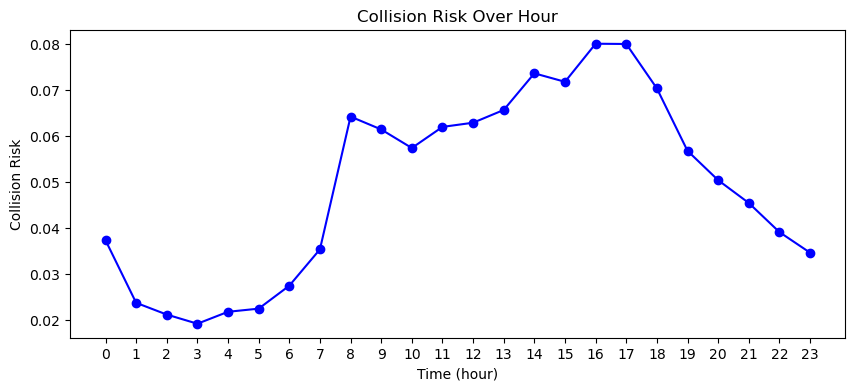

In [6]:
hour_plot = collisions_hour.groupby(by=['CRASH HOUR']).agg({'collision by hour': 'mean'}).reset_index()

color = 'blue'
figsize = (10, 4)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(hour_plot['CRASH HOUR'], hour_plot['collision by hour'], color=color, marker='o')
ax.set_xticks([x for x in range(24)])
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Collision Risk')
plt.title('Collision Risk Over Hour')
plt.show()

### Collision risk by days of the week

In [7]:
# primary key: streetID, dayofweek
collisions_dayweek = collisions.groupby(by=['streetID', 'dayofweek']).agg({'streetID': 'count'}) 
collisions_dayweek = collisions_dayweek.rename(columns={'streetID': 'total'}).reset_index()

# primary key: streetID, dayofweek
collisions_dayweek = pd.merge(left=collisions_dayweek, right=collisions_street, how='left', on='streetID')
collisions_dayweek['collision by day of week'] = collisions_dayweek.apply(lambda row: (row['total']/row['total_collision']), axis=1)
collisions_dayweek = collisions_dayweek.drop(columns=['total', 'total_collision'])
collisions_dayweek.head()

,streetID,dayofweek,collision by day of week
0,0.0,0,0.144681
1,0.0,1,0.157447
2,0.0,2,0.119149
3,0.0,3,0.204255
4,0.0,4,0.153191


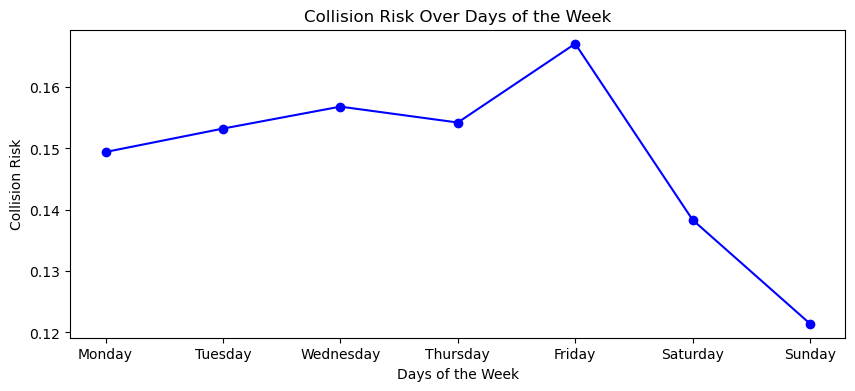

In [8]:
week_plot = collisions_dayweek.groupby(by=['dayofweek']).agg({'collision by day of week': 'mean'}).reset_index()

fig, ax = plt.subplots(figsize=figsize)
ax.plot(week_plot['dayofweek'], week_plot['collision by day of week'], color=color, marker='o')
ax.set_xticks(ticks=[x for x in range(7)], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_xlabel('Days of the Week')
ax.set_ylabel('Collision Risk')
plt.title('Collision Risk Over Days of the Week')
plt.show()